# IAA primera etapa

En esta notebook vamos a ver cuánto estuvieron de acuerdo los etiquetadores 

Primero, carguemos el excel con las etiquetas

In [1]:
import pandas as pd
import glob
import numpy as np
import re


paths = glob.glob("../data/etiquetados_abril_2021/*.xlsx")

dfs = []
annotators = []

for path in paths:
    name = path[path.find("(")+1:path.find(")")]
    
    paths = glob.glob("../data/etiquetados_abril_2021/*.xlsx")

    df = pd.read_excel(path)
    df = df.iloc[3:]
    df["id"] = df[df.columns[0]]
    del df["Unnamed: 0"]
    
    
    annotators.append(name)
    df["anotador"] = name
    dfs.append(df)
    
annotators = sorted(annotators)
annotator_df = pd.concat(dfs).set_index(["anotador", "id"])

In [3]:
label_cols = ['TARGET A', 'TARGET B', 'TARGET C', 'TARGET D',
       'TARGET E', 'TARGET F']


In [4]:
idx = pd.MultiIndex.from_product([label_cols, annotators])
df = pd.DataFrame(index=idx)

id2title = dfs[0][["id", "titulo"]].set_index("id").to_dict()["titulo"]


for idx, row in annotator_df.iterrows():
    for col in label_cols:
        if type(row[col]) is str:
            row[col] = row[col].strip().upper()
            
            if row[col] not in {"POS", "NEG", "NEU"}:
                row[col] = float('nan')
                
            df.loc[(col, idx[0]), idx[1]] = row[col]
df

23    24    31    39    75    77    78    82    84    90     ...  \
TARGET A #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
         #2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
         #3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
TARGET B #1   NaN   NaN   NaN   NaN   NEG   NaN   NaN   NaN   NEG   NaN  ...   
         #2   NaN   NaN   NaN   NaN   NEG   NaN   NaN   NaN   NEG   NaN  ...   
         #3   NaN   NaN   NaN   NaN   NEG   NaN   NaN   NaN   POS   NaN  ...   
TARGET C #1   NaN   NaN   NaN   POS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
         #2   NaN   NaN   NaN   POS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
         #3   NaN   NaN   NaN   POS   NaN   NaN   NaN   NaN   NaN   NaN  ...   
TARGET D #1   NEG   POS   NEU   NaN   NaN   NaN   POS   POS   NaN   NaN  ...   
         #2   POS   POS   NEU   NaN   NaN   NaN   POS   POS   NaN   NaN  ...   
         #3   POS   POS   POS   NaN   NaN   NaN   POS   POS   NaN   NaN  ...   
TARGET E #1   NaN   NaN   NaN   NEG   NaN   NEU   NaN   NaN   NaN   NEG  ...   
         #2   NaN   NaN   NaN   NEG   NaN   POS   NaN   NaN   NaN   NEG  ...   
         #3   NaN   NaN   NaN   NEG   NaN   POS   NaN   NaN   NaN   NEG  ...   
TARGET F #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
         #2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
         #3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

            12056 12749 22104 6603  21820 21883 21910 22222 22312 22607  
TARGET A #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
TARGET B #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
TARGET C #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #2   NaN   NaN   POS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #3   NaN   NaN   POS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
TARGET D #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
TARGET E #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #2   NaN   NaN   NaN   NEU   NEU   NEU   POS   NEG   NEU   NEU  
         #3   NEG   NEU   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
TARGET F #1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
         #3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[18 rows x 2095 columns]

In [5]:
import krippendorff

for label in label_cols:
    print(label)
    mat = df.loc[label].notna().values
    mat = mat.astype(float)
    alpha = krippendorff.alpha(mat)
    
    support = (mat.sum(axis=0) > 0).sum()
    print(f"Alpha sobre etiquetar {label:<12}: {alpha:.3f} (soporte {support})")


TARGET A
Alpha sobre etiquetar TARGET A    : 0.977 (soporte 30)
TARGET B
Alpha sobre etiquetar TARGET B    : 0.983 (soporte 126)
TARGET C
Alpha sobre etiquetar TARGET C    : 0.977 (soporte 1076)
TARGET D
Alpha sobre etiquetar TARGET D    : 0.986 (soporte 216)
TARGET E
Alpha sobre etiquetar TARGET E    : 0.964 (soporte 998)
TARGET F
Alpha sobre etiquetar TARGET F    : 1.000 (soporte 15)


# Agreements

Veamos qué tanto acuerdo hay por cada fuerza. Probemos primero el agreement ordinal (es decir, que es peor decir NEG y POS que NEG y NEU, por ejemplo)

In [6]:
from sklearn.metrics import cohen_kappa_score

for label in label_cols:
    print(label)
    mat = df.loc[label].values
    mat[mat == 'NEG'] = -1
    mat[mat == 'POS'] = 1
    mat[mat == 'NEU'] = 0
    mat = mat.astype(float)
    alpha = krippendorff.alpha(mat, level_of_measurement="ordinal")
    
    support = ((~np.isnan(mat)).sum(axis=0) > 0).sum()
    print(f"Alpha sobre etiquetar {label:<12}: {alpha:.3f} (soporte {support})")


TARGET A
Alpha sobre etiquetar TARGET A    : 0.456 (soporte 30)
TARGET B
Alpha sobre etiquetar TARGET B    : 0.433 (soporte 126)
TARGET C
Alpha sobre etiquetar TARGET C    : 0.619 (soporte 1076)
TARGET D
Alpha sobre etiquetar TARGET D    : 0.463 (soporte 216)
TARGET E
Alpha sobre etiquetar TARGET E    : 0.600 (soporte 998)
TARGET F
Alpha sobre etiquetar TARGET F    : 0.090 (soporte 15)


Antes nos dio esto:

- FdT
Alpha sobre etiquetar FdT         : 0.738 (soporte 73)
- JxC
Alpha sobre etiquetar JxC         : 0.780 (soporte 72)
- Lavagna
Alpha sobre etiquetar Lavagna     : 0.404 (soporte 7)
- FIT
Alpha sobre etiquetar FIT         : 0.749 (soporte 15)
- Espert
Alpha sobre etiquetar Espert      : 0.417 (soporte 3)
- Centurión
Alpha sobre etiquetar Centurión   : nan (soporte 1)

Con match exacto

In [7]:
from sklearn.metrics import cohen_kappa_score

for label in label_cols:
    print(label)
    mat = df.loc[label].values
    mat[mat == 'NEG'] = -1
    mat[mat == 'POS'] = 1
    mat[mat == 'NEU'] = 0
    mat = mat.astype(float)
    alpha = krippendorff.alpha(mat, level_of_measurement="nominal")
    
    support = ((~np.isnan(mat)).sum(axis=0) > 0).sum()
    print(f"Alpha sobre etiquetar {label:<12}: {alpha:.3f} (soporte {support})")


TARGET A
Alpha sobre etiquetar TARGET A    : 0.337 (soporte 30)
TARGET B
Alpha sobre etiquetar TARGET B    : 0.387 (soporte 126)
TARGET C
Alpha sobre etiquetar TARGET C    : 0.506 (soporte 1076)
TARGET D
Alpha sobre etiquetar TARGET D    : 0.419 (soporte 216)
TARGET E
Alpha sobre etiquetar TARGET E    : 0.478 (soporte 998)
TARGET F
Alpha sobre etiquetar TARGET F    : 0.155 (soporte 15)


Antes nos dio...

- FdT
Alpha sobre etiquetar FdT         : 0.668 (soporte 73)
- JxC
Alpha sobre etiquetar JxC         : 0.667 (soporte 72)
- Lavagna
Alpha sobre etiquetar Lavagna     : 0.403 (soporte 7)
- FIT
Alpha sobre etiquetar FIT         : 0.625 (soporte 15)
- Espert
Alpha sobre etiquetar Espert      : 0.200 (soporte 3)
- Centurión
Alpha sobre etiquetar Centurión   : nan (soporte 1)


Empeoró sensiblemente el agreement

In [17]:

def anyone_annotated(label):
    party_df = df.loc[label]
    party_df = party_df[party_df.columns[party_df.notna().any()]].T

    titles = [id2title[id] for id in party_df.index]
    party_df["titulo"] = titles
    
    order = ["titulo"] + list(party_df.columns.difference(["titulo"]))
    return party_df[order]

pd.options.display.max_colwidth = 120
pd.options.display.max_rows = 100

anyone_annotated("TARGET D")

,titulo,#1,#2,#3
23,Barrio Aeroclub: [TARGET D] propone urbanización y adjudicación de terrenos,-1,1,1
24,Elecciones municipales: el #FITUnidad busca fortalecer [TARGET D] en la ciudad de Neuquén,1,1,1
31,[Videos] Mirá todos los spots del [TARGET D] en Mendoza,0,0,1
78,El [TARGET D] amplió sus bancas en el Concejo Deliberante en Neuquén,1,1,1
82,Julieta Katcoff: “Queremos fortalecer una alternativa de [TARGET D] en la ciudad”,1,1,1
...,...,...,...,...
22465,"Votó Laura Vilches: ""En el actual escenario es necesario fortalecer las bancas de [TARGET D] """,1,1,1
22466,"Votó Laura Vilches: ""Es necesario fortalecer a [TARGET D] ante las peleas que se vienen""",1,1,1
22608,Declaración del Partido Obrero-[TARGET D] ante los resultados de las elecciones 2019,0,0,0
8935,Ordenan la libertad de un militante de izquierda detenido desde los incidentes por la reforma jubilatoria,NaN,NaN,0


Vemos que hay un problema acá

## Matrices de confusión para FdT

In [9]:
from sklearn.metrics import confusion_matrix
label = "TARGET E"
idx1 = annotators[0]
idx2 = annotators[1]

party_df = df.loc[label].loc[[idx1, idx2]]
    
labeled = party_df.notna().all()
    
sub_df = party_df[party_df.columns[labeled]]


cm = confusion_matrix(sub_df.loc[idx1].astype(int), sub_df.loc[idx2].astype(int), labels=[-1, 0, 1])

labels = ["NEG", "NEU", "POS"]
dd = pd.DataFrame(cm, columns=[f"{l}_{idx2}" for l in labels])


<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

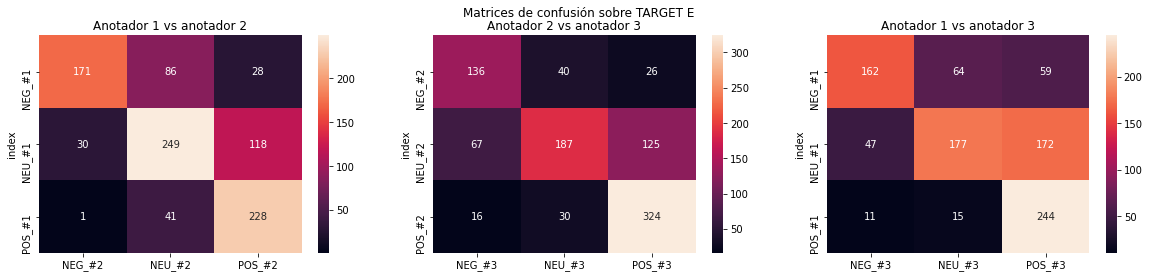

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["NEG", "NEU", "POS"]

def conf_matrix(label, idx1, idx2):
    annot1 = annotators[idx1]
    annot2 = annotators[idx2]
    party_df = df.loc[label].loc[[annot1, annot2]]
    
    labeled = party_df.notna().all()
    
    sub_df = party_df[party_df.columns[labeled]]
    cm = confusion_matrix(sub_df.loc[annot1].astype(int), sub_df.loc[annot2].astype(int), labels=[-1, 0, 1])

    dd = pd.DataFrame(cm, columns=[f"{l}_{annot2}" for l in labels])
    dd["index"] = [f"{l}_{annot1}" for l in labels]
    dd.set_index("index", inplace=True)
    
    return dd.astype(int)


label = "TARGET E"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True, fmt=".0f")
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True, fmt=".0f")
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True, fmt=".0f")

Anotador 1 vs anotador 3 tienen 59 en el cuadrante superior derecho (problemático). 

## Matrices de confusión para JxC

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

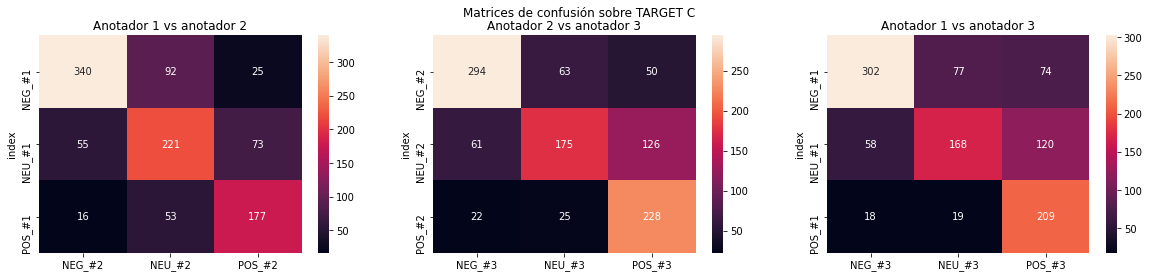

In [20]:
label = "TARGET C"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True, fmt=".0f")
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True, fmt=".0f")
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True, fmt=".0f")

Idem acá. También entre el 2 y el 3 acá

# FIT


<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

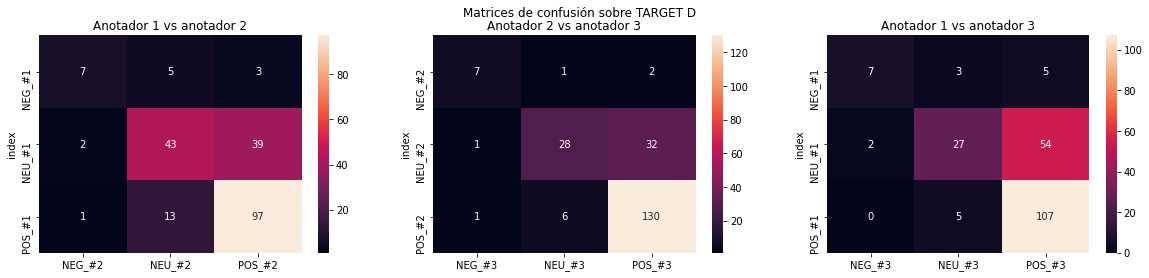

In [23]:
label = "TARGET D"

fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True, fmt=".0f")
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True, fmt=".0f")
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True, fmt=".0f")

No mucho que decir

## Lavagna

<AxesSubplot:title={'center':'Anotador 1 vs anotador 3'}, ylabel='index'>

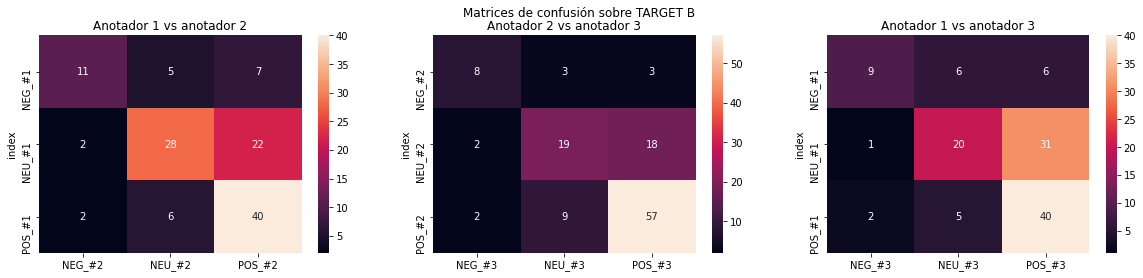

In [24]:
label = "TARGET B"


fig = plt.figure(figsize=(20, 4))
fig.suptitle(f"Matrices de confusión sobre {label}")




plt.subplot(1,3, 1)
plt.title("Anotador 1 vs anotador 2")
sns.heatmap(conf_matrix(label, 0, 1), annot=True)
plt.subplot(1,3, 2)
plt.title("Anotador 2 vs anotador 3")
sns.heatmap(conf_matrix(label, 1, 2), annot=True)
plt.subplot(1,3, 3)
plt.title("Anotador 1 vs anotador 3")
sns.heatmap(conf_matrix(label, 0, 2), annot=True)